In [121]:
import selenium
from selenium import webdriver
import time
from skimage import io
import matplotlib.pyplot as plt
from urllib import error
import requests
import os
import pandas as pd
import numpy as np
import urllib.request
import cv2

In [103]:
DRIVER_PATH = "/Users/jsusser/Desktop/chromedriver"
wd = webdriver.Chrome(executable_path=DRIVER_PATH)

In [104]:
def split(x):
    line = []
    final = []
    num = 1
    for y in x.split(' '):
        line.append(y)
        if num/3 == int(num/3):
            final.append(' '.join(line))
            line = []
        num += 1
    final.append(' '.join(line))
    return '\n'.join(final)

In [140]:
def fetch_image_urls(query:str, max_links_to_fetch:int, wd:webdriver, manager:str, sleep_between_interactions:int=1):
    def scroll_to_end(wd):
        wd.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(sleep_between_interactions)    
    search_url = "https://www.google.com/search?safe=off&site=&tbm=isch&source=hp&q={q}&oq={q}&gs_l=img"
    wd.get(search_url.format(q=query))
    image_urls = []
    scroll_to_end(wd)
    #print(wd.page_source)
    thumbnail_results = wd.find_elements_by_css_selector("img.Q4LuWd")
    number_results = len(thumbnail_results)
    p = 0
    a = wd.find_elements_by_css_selector("a.VFACy.kGQAp.sMi44c.lNHeqe.WGvvNb")
    global face_cascade
    while True:
        if len(thumbnail_results) == p:
            break
        if (p > 10 and len(image_urls) > 0) or p > 15:
            break
        i = a[p]
        img_real = thumbnail_results[p]
        img = img_real.get_attribute('src')
        alt = img_real.get_attribute('alt')
        txt = i.text
        href = i.get_attribute('href')
        print(txt)
        print(href)
        p += 1
        try: 
            imgURL = img
            path = "/Users/jsusser/Desktop/managers/{}/{}{}.jpg".format(manager,p,query)
            urllib.request.urlretrieve(imgURL, path)
            image = cv2.imread(path)
            faces = face_cascade.detectMultiScale(image, 1.1, 5)
            if len(faces) < 1 or len(faces) > 1:
                os.remove(path)
            else:
                check.loc[len(check)] = [manager,href, txt, alt, path]
                image_urls.append(img)
        except error.HTTPError as e:
            continue
        
    return image_urls

In [141]:
   %%javascript
    IPython.OutputArea.auto_scroll_threshold = 100

<IPython.core.display.Javascript object>

In [142]:
global check
global num

df = pd.read_csv("final_managers.csv", index_col=0)
num = 1
check = pd.DataFrame({}, columns=["manager","href", "href_text", "alt", "img"])
face_cascade = cv2.CascadeClassifier('/Users/jsusser/documents/cv2/haarcascade_frontalface_default.xml')
done = os.listdir("/Users/jsusser/desktop/final_managers")
none = pd.DataFrame({}, columns=["name","ticker", "manager"])
for index, instance in df.iterrows():
    num += 1
    equity = instance["Ticker"]
    manager = instance["Manager"]
    #pd.isna(manager)
    """if "%s.jpg" % manager in done:
        continue"""
    if manager != manager or manager.split(' ')[0] == "#N/A":
        none.loc[len(none)] = [instance["Name_x"], instance["Ticker"], instance["Manager"]]
        continue
    if not manager in os.listdir("/Users/jsusser/Desktop/managers/"):
        os.mkdir("/Users/jsusser/Desktop/managers/{}".format(manager))
        
    print("\n\n---------------------\n\n\n\n",manager)
    img_urls = fetch_image_urls(equity+" "+manager,3,wd, manager)
    
    if len(img_urls) == 0:
        none.loc[len(none)] = [instance["Name_x"], instance["Ticker"], instance["Manager"]]
        
 
        



---------------------



 Bruce H Monrad
Northeast Investors Trust |
northeastinvestors.com
https://northeastinvestors.com/our-team/bruce-h-monrad/
Bruce H. Monrad
northeastinvestors.com
https://northeastinvestors.com/our-team/bruce-h-monrad/
Northeast Investors Trust |
northeastinvestors.com
https://northeastinvestors.com/ernest-monrad-legacy/
Northeast Investors Trust |
northeastinvestors.com
https://northeastinvestors.com/our-team/bruce-h-monrad/
Equities Could Be a Tailwind for High Yield
northeastinvestors.com
https://northeastinvestors.com/wp-content/uploads/2019/12/NTHEX-%E2%80%94-High-Yield-vs.-Stocks-v4.pdf
Northeast Investors Trust |
northeastinvestors.com
https://northeastinvestors.com/about/our-team/
High Yield: An Alternative to Stocks ...
northeastinvestors.com
https://northeastinvestors.com/wp-content/uploads/2020/05/Northeast-High-Yield-as-Equity-Alternative.pdf
Northeast Investors Trust |
northeastinvestors.com
https://northeastinvestors.com/higher-taxes-and-high-yie

Archives for 2016 | Mutual Fund ...
mutualfundobserver.com
https://www.mutualfundobserver.com/2016/page/2/
Archives for 2016 | Mutual Fund ...
mutualfundobserver.com
https://www.mutualfundobserver.com/2016/page/2/
Mutual Fund Observer
mutualfundobserver.com
https://www.mutualfundobserver.com/2016/11/
Archives for 2016 | Mutual Fund ...
mutualfundobserver.com
https://www.mutualfundobserver.com/2016/page/2/
497 1 rbc170286_497.htm 497 (
sec.gov
https://www.sec.gov/Archives/edgar/data/1272950/000089710117000159/rbc170286_497.htm
Archives for January 2019 | Mutual Fund ...
mutualfundobserver.com
https://www.mutualfundobserver.com/2019/01/


---------------------



 Justin Jewell
Justin Jewell
rbcgam.com
https://www.rbcgam.com/en/ca/profile/justin-jewell/detail
RBC Funds Trust
sec.gov
https://www.sec.gov/Archives/edgar/data/1272950/000119312519301040/d828379d485apos.htm
RBC Funds Trust
sec.gov
https://www.sec.gov/Archives/edgar/data/1272950/000119312519301040/d828379d485apos.htm
printmgr f



---------------------



 Frank J Reda
BMO Funds, Inc.
archive.fast-edgar.com
http://archive.fast-edgar.com/20171101/AF22A22FZM2RK2ZZ2R2I2WXMGNLQEZ22Z292
BMO Funds, Inc.
archive.fast-edgar.com
http://archive.fast-edgar.com/20171101/AF22A22FZM2RK2ZZ2R2I2WXMGNLQEZ22Z292
BMO Funds, Inc.
sec.gov
https://www.sec.gov/Archives/edgar/data/889366/000119312516762916/d242208dncsr.htm
BMO Funds, Inc.
sec.gov
https://www.sec.gov/Archives/edgar/data/889366/000119312519287948/d786318dncsr.htm
BMO Funds, Inc.
archive.fast-edgar.com
http://archive.fast-edgar.com/20171101/AF22A22FZM2RK2ZZ2R2I2WXMGNLQEZ22Z292
BMO Funds, Inc.
sec.gov
https://www.sec.gov/Archives/edgar/data/889366/000119312516762916/d242208dncsr.htm
BMO Funds, Inc.
sec.gov
https://www.sec.gov/Archives/edgar/data/889366/000119312516762916/d242208dncsr.htm
BMO Funds, Inc.
sec.gov
https://www.sec.gov/Archives/edgar/data/889366/000119312516762916/d242208dncsr.htm
BMO Funds, Inc.
archive.fast-edgar.com
http://archive.fast-edgar.com/20171101/A

In Focus
invesco.com
https://www.invesco.com/us-rest/contentdetail?contentId=e8c55c743c3d5710VgnVCM1000006e36b50aRCRD&dnsName=us&title=invesco-announces-upcoming-retirement-of-joe-portera
Invesco Corporate Bond Fund
invesco.com
https://www.invesco.com/us/financial-products/mutual-funds/product-detail?audienceType=Ria&fundId=30481
Speakers — FAME
famesf.org
http://www.famesf.org/speakers
Invesco, DFA cuts fees ...
citywireusa.com
https://citywireusa.com/professional-buyer/news/fund-files-ex-wells-pm-resurfaces-at-invesco-dfa-cuts-fees/a1420565
Wells Fargo AM's co-head of US high ...
citywireselector.com
https://citywireselector.com/news/wells-fargo-am-s-co-head-of-us-high-yield-to-exit/a1389442
Fund Files: GSAM gatekeepers drop shop ...
citywireusa.com
https://citywireusa.com/professional-buyer/news/fund-files-gsam-gatekeepers-drop-shop-hancock-names-new-hy-managers/a1392041


---------------------



 Matthew W Ryan
MHOBX: MFS® Global High Yield Fund | MFS
mfs.com
https://www.mfs.com/e

Fixed Income
barings.com
https://www.barings.com/at/institutional/viewpoints/quarterly-reviews/q4-2017/asset-classes/fixed-income
Barings Global Credit Income ...
barings.com
https://www.barings.com/us/guest/funds/mutual-funds/barings-global-credit-income-opportunities-fund
Barings Global Loan Fund
barings.com
https://www.barings.com/it/institutional/funds/qif/barings-global-loan-fund/IE00B65CF634
About Us – ELITeXPO Cargo Systems
elitexpocargo.com
https://www.elitexpocargo.com/about-elitexpocargo/
High Yield: Halfway There?
barings.com
https://www.barings.com/hken/individual/viewpoints/high-yield-halfway-there
Barings Global High Yield Credit ...
barings.com
https://www.barings.com/gb/institutional/funds/qif/barings-global-high-yield-credit-strategies-fund/IE00BYP34104


---------------------



 Jeff Sitzmann
Jeff Sitzmann, CFA - Buffalo Funds
buffalofunds.com
https://buffalofunds.com/team/jeff-sitzmann/
Jeff Sitzmann, CFA - Buffalo Funds
buffalofunds.com
https://buffalofunds.com/tea

Pioneer Series Trust Vii 2020 Annual ...
sec.report
https://sec.report/Document/0001821268-20-000158/
Pioneer Global High Yield Fund
pira.fgraphic.com
http://pira.fgraphic.com/noauth/pdf/19382.pdf
Certified Shareholder Report N-CSRS
sec.report
https://sec.report/Document/0001528621-20-001374/
The Year's Biggest Fund-Manager Changes ...
morningstar.com
https://www.morningstar.com/articles/221933/the-years-biggest-fundmanager-changes
Certified Shareholder Report N-CSRS
sec.report
https://sec.report/Document/0001528621-20-001374/
Certified Shareholder Report N-CSRS
sec.report
https://sec.report/Document/0001528621-20-001374/
Best Mutual Funds Are Investing ...
bloomberg.com
https://www.bloomberg.com/news/photo-essays/2011-02-03/how-2010s-best-mutual-funds-are-investing
The Fund Manager Shuffle - TheStreet
thestreet.com
https://www.thestreet.com/investing/funds/mutual-funds/the-fund-manager-shuffle-10356429
Certified Shareholder Report N-CSRS
sec.report
https://sec.report/Document/00015286

Merian North American Equity U1 Acc GBP ...
charles-stanley-direct.co.uk
https://www.charles-stanley-direct.co.uk/ViewFund?Sedol=BHBX880%20%20%20&Name=Merian_North_American_Equity_U1_Acc_GBP&Isin=GB00BHBX8800
Town of Stowe 2019 Grand List Assessment
townofstowevt.org
https://www.townofstowevt.org/vertical/Sites/%7B97FA91EA-60A3-4AC6-8466-F386C5AE9012%7D/uploads/2019_GRAND_LIST_DATA.XLS.pdf
Parcel ID Owner Co-Owner Location Tax ...
townofstowevt.org
https://www.townofstowevt.org/vertical/sites/%7B97FA91EA-60A3-4AC6-8466-F386C5AE9012%7D/uploads/GL_2020.pdf
ASI Global Focused Equity Ret Platform ...
charles-stanley-direct.co.uk
https://www.charles-stanley-direct.co.uk/ViewFund?sedol=B6915J9


---------------------



 Arthur Milson


---------------------



 George Westervelt
aberdeen investment funds
sec.gov
https://www.sec.gov/Archives/edgar/data/887210/000110465919011472/a19-3681_1485bpos.htm
Aberdeen Investment Funds 2020 ...
sec.report
https://sec.report/Document/0001104659-20-02713

Hotchkis & Wiley Funds /de/ 2020 ...
sec.report
https://sec.report/Document/0000894189-20-003348/
Hotchkis & Wiley Funds /de/ 2020 ...
sec.report
https://sec.report/Document/0000894189-20-003348/
485BPOS 1 hotchkis-wiley_485b.htm POST ...
sec.gov
https://www.sec.gov/Archives/edgar/data/1145022/000089418917001864/hotchkis-wiley_485b.htm
Hotchkis & Wiley Funds /de/ 2020 ...
sec.report
https://sec.report/Document/0000894189-20-003348/
485BPOS 1 hotchkis-wiley_485b.htm POST ...
sec.gov
https://www.sec.gov/Archives/edgar/data/1145022/000089418917001864/hotchkis-wiley_485b.htm
Richard H. Mak | Part-Time Audiophile
parttimeaudiophile.com
https://parttimeaudiophile.com/contributors/richard-h-mak/


---------------------



 Kelley G Baccei
Eaton Vance Adds Kelley G. Baccei and ...
prnewswire.com
https://www.prnewswire.com/news-releases/eaton-vance-adds-kelley-g-baccei-and-jeffrey-d-mueller-to-high-yield-bond-fund-portfolio-management-teams-300871105.html
Kelley G. Baccei - Biography
marketscre

Maneuvering a tricky bond market
jsonline.com
https://www.jsonline.com/story/money/columnists/investment-trends/2016/10/08/maneuvering-tricky-bond-market/91699762/


---------------------



 Rob Cook
JPMorgan High Yield Fund-I | J.P ...
am.jpmorgan.com
https://am.jpmorgan.com/us/en/asset-management/adv/products/jpmorgan-high-yield-fund-i-4812c0803
Factsheet: JPMorgan High Yield Fund (R5)
am.jpmorgan.com
https://am.jpmorgan.com/blob-gim/1383326608346/83456/FS-HY-R5.PDF
497K - Prospectus - JPMORGAN TRUST II ...
fintel.io
https://fintel.io/doc/sec-ohyfx-jpmorgan-high-yield-fund-497k-2020-june-26-18440-544
JPMorgan Trust I
sec.report
https://sec.report/Document/0001193125-20-184241/d946109d497.htm
JPMorgan Trust I
sec.report
https://sec.report/Document/0001193125-20-184241/d946109d497.htm
JPMorgan Trust I
sec.report
https://sec.report/Document/0001193125-20-184241/d946109d497.htm
JPMorgan Trust I
sec.report
https://sec.report/Document/0001193125-20-184241/d946109d497.htm
JPMorgan Trust I


485BPOS
archive.fast-edgar.com
http://archive.fast-edgar.com/20191227/AN2ZLQ2FZM2RGZZA222C2ZXRJKQJZZ22ZSB2/
485BPOS
sec.gov
https://www.sec.gov/Archives/edgar/data/875186/000119312518356415/d661390d485bpos.htm
485BPOS
sec.gov
https://www.sec.gov/Archives/edgar/data/875186/000119312518356415/d661390d485bpos.htm
485BPOS
sec.gov
https://www.sec.gov/Archives/edgar/data/875186/000119312518356415/d661390d485bpos.htm
485BPOS
sec.gov
https://www.sec.gov/Archives/edgar/data/875186/000119312518356415/d661390d485bpos.htm
497
sec.gov
https://www.sec.gov/Archives/edgar/data/875186/000119312516488348/d246511d497.htm
485BPOS
sec.gov
https://www.sec.gov/Archives/edgar/data/875186/000119312512517997/d451033d485bpos.htm
CONSULTING GROUP CAPITAL MARKETS FUNDS ...
pdf.secdatabase.com
http://pdf.secdatabase.com/234/0001193125-18-356415.pdf
CONSULTING GROUP CAPITAL MARKETS FUNDS ...
morganstanley.com
http://www.morganstanley.com/wealth/investmentsolutions/pdfs/trak/cgcm_sai.pdf


---------------------



 S

acit_ncsr-033112.htm
sec.gov
https://www.sec.gov/Archives/edgar/data/908406/000143774912005887/acit_ncsr-033112.htm
American Century Investment Trust 2010 ...
sec.report
https://sec.report/Document/0001467105-10-000046/
American Century Investment Trust 2010 ...
sec.report
https://sec.report/Document/0001467105-10-000046/
American Century Investment Trust 2010 ...
sec.report
https://sec.report/Document/0001467105-10-000046/
American Century Investment Trust 2018 ...
sec.report
https://sec.report/Document/0000908406-18-000015/


---------------------



 Kevin Akioka
acit_ncsr-033112.htm
sec.gov
https://www.sec.gov/Archives/edgar/data/908406/000143774912005887/acit_ncsr-033112.htm
acit_ncsr-033112.htm
sec.gov
https://www.sec.gov/Archives/edgar/data/908406/000143774912005887/acit_ncsr-033112.htm
Kevin Akioka | | Fund Manager Fact ...
citywireusa.com
https://citywireusa.com/professional-buyer/manager/kevin-akioka/d21373
American Century Investment Trust 2015 ...
sec.report
https://sec.rep

MATTHEW B. SHULKIN, CFA
amundipioneer.com
https://www.amundipioneer.com/institutional/ezjscore/call/ezjscamundibuzz::sfForwardFront::paramsList=service=ProxyGedApi&routeId=_dl_N2FjMTY5MWZiYzAzOGRiOGI4NDEzYzQyZjk0NmUyNWM_download
Pioneer High Yield Fund 2020 Annual ...
sec.report
https://sec.report/Document/0001821268-20-000159/
Pioneer High Yield Fund 2020 Annual ...
sec.report
https://sec.report/Document/0001821268-20-000159/
MATTHEW B. SHULKIN, CFA
amundipioneer.com
https://www.amundipioneer.com/institutional/ezjscore/call/ezjscamundibuzz::sfForwardFront::paramsList=service=ProxyGedApi&routeId=_dl_N2FjMTY5MWZiYzAzOGRiOGI4NDEzYzQyZjk0NmUyNWM_download
Matt Shulkin - VP - High Yield ...
linkedin.com
https://www.linkedin.com/in/matt-shulkin-55529b34
Matt Shulkin - VP - High Yield ...
linkedin.com
https://www.linkedin.com/in/matt-shulkin-55529b34
Matt Shulkin - VP - High Yield ...
linkedin.com
https://www.linkedin.com/in/matt-shulkin-55529b34
Pioneer High Yield Fund 2020 Annual ...
sec.re

485BPOS
sec.gov
https://www.sec.gov/Archives/edgar/data/787623/000119312512085688/d306100d485bpos.htm
497
sec.gov
https://www.sec.gov/Archives/edgar/data/787623/000119312518071869/d489170d497.htm
485BPOS
sec.gov
https://www.sec.gov/Archives/edgar/data/787623/000119312512085688/d306100d485bpos.htm


---------------------



 David Cole
MHITX: MFS® High Income Fund A Shares | MFS
mfs.com
https://mfs.com/en-us/individual-investor/product-strategies/mutual-funds/MHITX-mfs-sup-sup-high-income-fund-share-A.html
David Cole - Senior Vice President ...
linkedin.com
https://www.linkedin.com/in/ddcole
David Cole - Software Engineer - 4V ...
linkedin.com
https://www.linkedin.com/in/david-cole-117881a4
MFS® High Income Fund
mfs.com
https://www.mfs.com/content/dam/mfs-enterprise/mfscom/products/factsheet/mfh_fs.pdf
David Cole Net Worth (2020) | wallmine
wallmine.com
https://wallmine.com/nysemkt/emx/officer/2010362/david-cole
Ellis Martin Report: EMX Royalty Corp's ...
youtube.com
https://www.youtube

Shenkman Capital Management, Inc ...
harborfunds.com
https://www.harborfunds.com/subadviser/shenkman-capital-management
harbor funds
sec.gov
https://www.sec.gov/Archives/edgar/data/793769/000119312518346087/d658051d485apos.htm
Harbor Funds
sec.gov
https://www.sec.gov/Archives/edgar/data/793769/000119312517062652/d305658d485bpos.htm
International &amp; Global 485APOS
sec.gov
https://www.sec.gov/Archives/edgar/data/793769/000119312518346087/d658051d485apos.htm
Harbor Target Retirement Funds 485APOS
sec.gov
https://www.sec.gov/Archives/edgar/data/793769/000119312519222441/d778278d485apos.htm
Harbor Fixed Income Funds 485APOS
sec.gov
https://www.sec.gov/Archives/edgar/data/793769/000119312518082502/d548691d485apos.htm
Harbor High-Yield Bond Fund
harborfunds.com
https://www.harborfunds.com/docs/High-Yield_Bond_Fund_Summary_Prospectus.pdf
Harbor Funds Post-effective amendment ...
sec.report
https://sec.report/Document/0001193125-19-314035/
Harbor High-Yield Bond Fund
sec.gov
https://www.sec.



---------------------



 Adrian Helfert
P. Adrian Helfert - westwoodgroup.com
westwoodgroup.com
https://westwoodgroup.com/person/adrian-a-helfert/
Adrian Helfert
uk.media.amundi.com
https://uk.media.amundi.com/experts/adrian-helfert.html
Adrian Helfert Joins Westwood Holdings ...
globenewswire.com
https://www.globenewswire.com/news-release/2019/01/28/1706333/0/en/Adrian-Helfert-Joins-Westwood-Holdings-Group.html
Adrian Helfert | September 2019 ...
youtube.com
https://www.youtube.com/watch?v=rWgzNbrZShI
Dropping interest rates' are driving ...
finance.yahoo.com
https://finance.yahoo.com/video/dropping-interest-rates-driving-growth-225828736.html
Multi-Asset Investing
westwoodgroup.com
https://westwoodgroup.com/investment-management/multi-asset/
Adrian Helfert Joins Westwood Holdings ...
globenewswire.com
http://www.globenewswire.com/fr/news-release/2019/01/28/1706333/0/en/Adrian-Helfert-Joins-Westwood-Holdings-Group.html
WHG Factsheets.xlsx
westwoodgroup.com
https://westwoodgroup.com

Metropolitan West Funds
sec.gov
https://www.sec.gov/Archives/edgar/data/1028621/000119312510172149/d485bpos.htm
Metropolitan West Funds
sec.gov
https://www.sec.gov/Archives/edgar/data/1028621/000119312515270736/d922577d497.htm
Metropolitan West Funds
sec.gov
https://www.sec.gov/Archives/edgar/data/1028621/000119312515270736/d922577d497.htm
Metropolitan West Funds
sec.gov
https://www.sec.gov/Archives/edgar/data/1028621/000119312515270736/d922577d497.htm
Metropolitan West Funds
sec.gov
https://www.sec.gov/Archives/edgar/data/1028621/000119312510172149/d485bpos.htm


---------------------



 Caryn Rothman
John Hancock High Yield Fund (JHHBX)
jhinvestments.com
https://www.jhinvestments.com/investments/mutual-fund/fixed-income-funds/high-yield-fund-a-jhhbx
John Hancock High Yield Fund (JHHBX)
jhinvestments.com
https://www.jhinvestments.com/investments/mutual-fund/fixed-income-funds/high-yield-fund-a-jhhbx
John Hancock High Yield Fund (JHHBX)
jhinvestments.com
https://www.jhinvestments.com/

Jean C. Lin | Nuveen
nuveen.com
https://www.nuveen.com/en-us/people/profiles/l/jean-c-lin
University of Iowa | MS Page
tiaa.org
https://www.tiaa.org/public/tcm/uiowa/investment-performance/mutualfunds/profile?ticker=4530798
University of Iowa | MS Page
tiaa.org
https://www.tiaa.org/public/tcm/uiowa/investment-performance/mutualfunds/profile?ticker=4530798
TIAA-CREF High-Yield Fund | Mutual Fund ...
nuveen.com
https://www.nuveen.com/mutual-funds/tiaa-cref-high-yield-fund
Item 8 - 12/19/2019 - Board Meeting
treasurer.ca.gov
https://www.treasurer.ca.gov/scholarshare/meeting/2019/20191219/staff/8.pdf
Item 8 - 12/19/2019 - Board Meeting
treasurer.ca.gov
https://www.treasurer.ca.gov/scholarshare/meeting/2019/20191219/staff/8.pdf
TIAA-CREF High-Yield Fund | Mutual Fund ...
nuveen.com
https://www.nuveen.com/mutual-funds/tiaa-cref-high-yield-fund
Item 8 - 12/19/2019 - Board Meeting
treasurer.ca.gov
https://www.treasurer.ca.gov/scholarshare/meeting/2019/20191219/staff/8.pdf
Item 8 - 12/19/2019 -

Prospectus
principal.com
https://www.principal.com/allweb/docs/ris/investments/prospectus/1/FV716A.pdf
Principal High Yield Institutional Fund ...
finance.yahoo.com
https://finance.yahoo.com/news/principal-high-yield-institutional-fund-110711967.html
PFI 1031 485A 040816 Combined Document
sec.gov
https://www.sec.gov/Archives/edgar/data/898745/000089874516001225/pfi1031485a040816filingbody.htm
PFI 1031 485A 040816 Combined Document
sec.gov
https://www.sec.gov/Archives/edgar/data/898745/000089874516001225/pfi1031485a040816filingbody.htm


---------------------



 Darrin E Smith
Darrin P Smith - Senior Engineering ...
linkedin.com
https://www.linkedin.com/in/darrin-p-smith-40643310
Prospectus
principal.com
https://www.principal.com/allweb/docs/ris/investments/prospectus/1/FV716A.pdf
PFI 1031 485B 2017 Combined Document
sec.gov
https://www.sec.gov/Archives/edgar/data/898745/000089874517000181/pfi1031485b2017filingbody.htm
PFI 1031 485B 2017 Combined Document
sec.gov
https://www.sec.gov/Ar

Generating Income in a Low Interest ...
payden.com
https://payden.com/pdf/GeneratingIncome09122012.pdf
Generating Income in a Low Interest ...
payden.com
https://payden.com/pdf/GeneratingIncome09122012.pdf
Generating Income in a Low Interest ...
payden.com
https://payden.com/pdf/GeneratingIncome09122012.pdf
Generating Income in a Low Interest ...
payden.com
https://payden.com/pdf/GeneratingIncome09122012.pdf
e485bpos
sec.gov
https://www.sec.gov/Archives/edgar/data/1172072/000095012310017323/a54708be485bpos.htm


---------------------



 James P Sarni "Jim"
Ancient history - PDF Free Download
pingpdf.com
https://pingpdf.com/pdf-96624.html


---------------------



 James T Wong
James T. Wong, CFA - Managing Principal ...
linkedin.com
https://www.linkedin.com/in/james-t-wong-cfa-6776912b
Generating Income in a Low Interest ...
payden.com
https://payden.com/pdf/GeneratingIncome09122012.pdf
PAYDEN HIGH INCOME FUND (PYHRX)
payden.com
https://www.payden.com/FundFact/5426/Fund%20Fact%20Shee

DWS High Income Fund
fundsus.dws.com
https://fundsus.dws.com/us/en-us/products/mutual-funds/dws-high-income-fund.html
DWS High Income Fund
fundsus.dws.com
https://fundsus.dws.com/us/en-us/products/mutual-funds/dws-high-income-fund.html/A
DWS High Income Fund
fundsus.dws.com
https://fundsus.dws.com/us/en-us/products/mutual-funds/dws-high-income-fund.html
Deutsche Dws Income Trust 2020 Annual ...
sec.report
https://sec.report/Document/0000088053-20-001355/
Deutsche Dws Income Trust 2019 ...
sec.report
https://sec.report/Document/0000088053-19-000051/
Form N-CSRS DEUTSCHE DWS INCOME TRUS ...
streetinsider.com
https://www.streetinsider.com/SEC+Filings/Form+N-CSRS+DEUTSCHE+DWS+INCOME+TRUS+For%3A+Mar+31/15588019.html
Deutsche Dws Income Trust 2019 ...
sec.report
https://sec.report/Document/0000088053-19-000051/
Deutsche Dws Income Trust 2019 ...
sec.report
https://sec.report/Document/0000088053-19-000051/
DWS GLOBAL HIGH INCOME FUND ...
fintel.io
https://fintel.io/doc/sec-sghax-dws-global-hi

a_hyan14.htm
sec.gov
https://www.sec.gov/Archives/edgar/data/787836/000092881617000216/a_hyan14.htm
Putnam High Yield Fund 2018 Semi-Annual ...
sec.report
https://sec.report/Document/0000928816-18-001537/nav
a_highyieldadv.htm
sec.gov
https://www.sec.gov/Archives/edgar/data/787836/000092881612001102/a_highyieldadv.htm
a_hya485b.htm
sec.gov
https://www.sec.gov/Archives/edgar/data/787836/000092881617001045/a_hya485b.htm
High Yield Fund Annual Report
putnam.com
https://www.putnam.com/literature/pdf/AN032-b9821cd79f4f61991c194f1b10c97322.pdf


---------------------



 Michael C Buchanan
Buchanan, Michael C. - The Wall Street ...
twst.com
https://www.twst.com/bio/michael-c-buchanan/
Legg Mason Partners Income Trust 2020 ...
sec.report
https://sec.report/Document/0001683863-20-005387/
Legg Mason Partners Series Funds, Inc ...
sec.report
https://sec.report/Document/0001193125-06-247076
Legg Mason Partners Income Trust 2020 ...
sec.report
https://sec.report/Document/0001683863-20-005387/
Legg



---------------------



 Andrew D Feltus
NWXIX Nationwide Amundi Global High ...
nationwidefinancial.com
https://nationwidefinancial.com/products/investments/mutual-funds/fund-list/fund-details/NWXIX
NWXIX Nationwide Amundi Global High ...
nationwidefinancial.com
https://nationwidefinancial.com/products/investments/mutual-funds/fund-list/fund-details/NWXIX
NATIONWIDE MUTUAL FUNDS Form 485BPOS ...
edgar.secdatabase.com
http://edgar.secdatabase.com/1139/119312519044091/filing-main.htm
NATIONWIDE MUTUAL FUNDS Form 485BPOS ...
edgar.secdatabase.com
http://edgar.secdatabase.com/1139/119312519044091/filing-main.htm
NATIONWIDE MUTUAL FUNDS Form 485BPOS ...
edgar.secdatabase.com
http://edgar.secdatabase.com/1139/119312519044091/filing-main.htm
NATIONWIDE MUTUAL FUNDS Form 485BPOS ...
edgar.secdatabase.com
http://edgar.secdatabase.com/1139/119312519044091/filing-main.htm
Andrew Feltus Net Worth (2020) | wallmine
wallmine.com
https://wallmine.com/people/72008/andrew-feltus
NATIONWIDE MUTUAL F

The Case for Bank Loans
pacificfunds.com
http://www.pacificfunds.com/investor/insights/video-library/the-case-for-bank-loans.html
485BPOS
sec.gov
https://www.sec.gov/Archives/edgar/data/1137761/000119312516661879/d173913d485bpos.htm
PACIFIC FUNDS SERIES TRUST Form 485BPOS ...
edgar.secdatabase.com
http://edgar.secdatabase.com/371/110465920086925/filing-main.htm


---------------------



 Lloyd McAdams
Anworth Mortgage Asset Corporation ...
anworth.com
https://www.anworth.com/corporate-overview/directors-officers/default.aspx
Definitive Proxy Statement
sec.gov
https://www.sec.gov/Archives/edgar/data/1047884/000119312507091986/ddef14a.htm
Definitive Proxy Statement
sec.gov
https://www.sec.gov/Archives/edgar/data/1047884/000102140803007929/ddef14a.htm
Awards – Duke Interdisciplinary Studies
sites.duke.edu
https://sites.duke.edu/interdisciplinary/category/awards/
Definitive Proxy Statement
sec.gov
https://www.sec.gov/Archives/edgar/data/1047884/000119312507091986/ddef14a.htm
PIA High Yiel

launch
sec.gov
https://www.sec.gov/Archives/edgar/data/804239/000110465917005864/a16-22978_14497.htm
Portfolio Report Card: A $408,303 ...
ca.finance.yahoo.com
https://ca.finance.yahoo.com/news/portfolio-report-card-408-303-141516810.html
launch
sec.gov
https://www.sec.gov/Archives/edgar/data/804239/000110465917005864/a16-22978_14497.htm
launch
sec.gov
https://www.sec.gov/Archives/edgar/data/804239/000110465917005864/a16-22978_14497.htm
SEI INSTITUTIONAL MANAGED TRUST
apps.seic.com
https://apps.seic.com/funddocuments/FundDocumentsUS/SAI/SEI-F-048.pdf
launch
sec.gov
https://www.sec.gov/Archives/edgar/data/804239/000110465917005864/a16-22978_14497.htm
launch
sec.gov
https://www.sec.gov/Archives/edgar/data/804239/000110465917005864/a16-22978_14497.htm
SEI INSTITUTIONAL MANAGED TRUST Form ...
pdf.secdatabase.com
http://pdf.secdatabase.com/1217/0001104659-19-005132.pdf
launch
sec.gov
https://www.sec.gov/Archives/edgar/data/804239/000110465917005864/a16-22978_14497.htm
launch
sec.gov
https:/

Deutsche Dws Income Trust 2019 ...
sec.report
https://sec.report/Document/0000088053-19-000051/
Form N-CSRS DEUTSCHE INCOME TRUST For ...
streetinsider.com
https://www.streetinsider.com/SEC+Filings/Form+N-CSRS+DEUTSCHE+INCOME+TRUST+For%3A+Apr+30/14359256.html
DEUTSCHE GLOBAL HIGH INCOME FUND ...
sec.gov
https://www.sec.gov/Archives/edgar/data/747677/000008805317001073/sr43017ghi.htm
DEUTSCHE GLOBAL HIGH INCOME FUND ...
sec.gov
https://www.sec.gov/Archives/edgar/data/747677/000008805317001073/sr43017ghi.htm
DWS GLOBAL HIGH INCOME FUND ...
fintel.io
https://fintel.io/doc/sec-sghax-dws-global-high-income-fund-ncsrs-2020-july-09-18452-763
DWS Global High Income Fund
fundsus.dws.com
https://fundsus.dws.com/us/en-us/products/mutual-funds/dws-global-high-income-fund.html
Deutsche Dws Income Trust 2019 ...
sec.report
https://sec.report/Document/0000088053-19-000051/
Deutsche Dws Income Trust 2019 ...
sec.report
https://sec.report/Document/0000088053-19-000051/
DEUTSCHE GLOBAL HIGH INCOME FUND 

Thomas H. Chow ...
barrons.com
https://www.barrons.com/articles/SB50001424052748704372504578284031184487100
Thomas H. Chow ...
barrons.com
https://www.barrons.com/articles/SB50001424052748704372504578284031184487100
Thomas H. Chow | Fund Manager Fact ...
citywireselector.com
https://citywireselector.com/manager/thomas-h-chow/d21136
AMERICAN HIGH INCOME TRUST - 485BPOS ...
fintel.io
https://fintel.io/doc/sec-ahitx-american-high-income-trust-american-high-income-trust-american-high-income-trust-class-a-485bpos-2019-november-29-18300
AMERICAN HIGH INCOME TRUST - 485BPOS ...
fintel.io
https://fintel.io/doc/sec-ahitx-american-high-income-trust-american-high-income-trust-american-high-income-trust-class-a-485bpos-2019-november-29-18300
American High Income Trust 2018 ...
sec.report
https://sec.report/Document/0000051931-18-001239/
Indexes Fell as Rate Hike Possibility Rose
sg.news.yahoo.com
https://sg.news.yahoo.com/us-stock-indexes-fell-rate-141535636.html
Money april2015 by egarel07 - issu

BlackRock High Yield Bond Instl BHYIX ß®
api.morningstar.com
http://api.morningstar.com/v2/service/report/GlobalFundReport?secid=FOUSA00K6F&reportid=GlobalFund&langid=en-US&pagestyle=A4
BLACKROCK HIGH YIELD BOND PORTFOLIO
sec.gov
https://www.sec.gov/Archives/edgar/data/1398078/000119312510020762/d497k.htm
BLACKROCK HIGH YIELD BOND PORTFOLIO ...
sec.gov
https://www.sec.gov/Archives/edgar/data/1398078/000119312517030190/d280230d497k.htm
BlackRock Low Duration Bond Portfolio ...
blackrock.com
https://www.blackrock.com/us/individual/literature/sai/sai-brfunds2-highyieldbond-lowdurationbond-corebondports-us.pdf?stream=reg&product=BR-CORE&shareClass=CLASS+A&documentId=920962%7E1413753%7E920366%7E1614919%7E1703377&iframeUrlOverride=%2Fus%2Findividual%2Fliterature%2Fsai%2Fsai-brfunds2-highyieldbond-lowdurationbond-corebondports-us.pdf
at BlackRock ...
citywireusa.com
https://citywireusa.com/professional-buyer/news/what-s-hot-and-what-s-not-at-blackrock/a1394835


---------------------



 Davi

Pace Select Advisors Trust 2018 ...
sec.report
https://sec.report/Document/0001104659-18-070871/
PACE
sec.gov
https://www.sec.gov/Archives/edgar/data/930007/000110465917070768/a17-22340_1485bpos.htm
PACE
sec.gov
https://www.sec.gov/Archives/edgar/data/930007/000110465917070768/a17-22340_1485bpos.htm
Form 497 PACE SELECT ADVISORS
streetinsider.com
https://www.streetinsider.com/SEC+Filings/Form+497+PACE+SELECT+ADVISORS/17663845.html
PACE
sec.gov
https://www.sec.gov/Archives/edgar/data/930007/000110465917070768/a17-22340_1485bpos.htm


---------------------



 Steve Kotsen
UBS Government Money Market Investments ...
fintel.io
https://fintel.io/doc/sec-pcexx-ubs-government-money-market-investments-fund-pace-select-advisors-trust-pace-high-yield-investments-class-a-497-2019-december-02-18301
UBS Government Money Market Investments ...
fintel.io
https://fintel.io/doc/sec-pcexx-ubs-government-money-market-investments-fund-pace-select-advisors-trust-pace-high-yield-investments-class-a-497-201

Pace Select Advisors Trust 2018 ...
sec.report
https://sec.report/Document/0001104659-18-070871/
UBS Government Money Market Investments ...
fintel.io
https://fintel.io/doc/sec-pcexx-ubs-government-money-market-investments-fund-pace-select-advisors-trust-pace-high-yield-investments-class-a-497-2019-december-02-18301
UBS Government Money Market Investments ...
fintel.io
https://fintel.io/doc/sec-pcexx-ubs-government-money-market-investments-fund-pace-select-advisors-trust-pace-high-yield-investments-class-a-497-2019-december-02-18301
PACE
sec.gov
https://www.sec.gov/Archives/edgar/data/930007/000110465917070768/a17-22340_1485bpos.htm
Pace Select Advisors Trust 2018 ...
sec.report
https://sec.report/Document/0001104659-18-070871/
PACE
sec.gov
https://www.sec.gov/Archives/edgar/data/930007/000110465917070768/a17-22340_1485bpos.htm
PACE® Select Advisors Trust
ubs.com
https://www.ubs.com/us/en/asset-management/individual-investors-and-financial-advisors/products/ii-pace/_jcr_content/mainpar

John Hancock Funds Ii 2019 Investment ...
sec.report
https://sec.report/Document/0001133228-19-005008/jhfii-html1498_497.htm
The New York Times 21 April 201 - The ...
scribd.com
https://www.scribd.com/document/353731085/The-New-York-Times-21-April-201-The-New-York-Times
The New York Times 21 April 201 - The ...
scribd.com
https://www.scribd.com/document/353731085/The-New-York-Times-21-April-201-The-New-York-Times
The New York Times 21 April 201 - The ...
scribd.com
https://www.scribd.com/document/353731085/The-New-York-Times-21-April-201-The-New-York-Times
the SAI - John Hancock Investments ...
pingpdf.com
https://pingpdf.com/pdf-the-sai-john-hancock-investments.html
The new york times january 07 2017 by ...
issuu.com
https://issuu.com/dfvdvfdfv/docs/the_new_york_times__january_07_2017


---------------------



 S Kenneth Leech "Ken"


---------------------



 Robert Spano
Professor of Conducting Robert Spano ...
oberlin.edu
https://www.oberlin.edu/news/professor-conducting-robert-sp

As filed with the U.S. Securities and ...
sec.gov
https://www.sec.gov/Archives/edgar/data/939934/000110465917059740/a17-18802_1485bpos.htm
As filed with the U.S. Securities and ...
sec.gov
https://www.sec.gov/Archives/edgar/data/939934/000110465917059740/a17-18802_1485bpos.htm
Inline XBRL Viewer
sec.gov
https://www.sec.gov/ix?doc=/Archives/edgar/data/939934/000110465920109362/tm2029219-1_485bpos.htm
Inline XBRL Viewer
sec.gov
https://www.sec.gov/ix?doc=/Archives/edgar/data/939934/000110465920109362/tm2029219-1_485bpos.htm
Inline XBRL Viewer
sec.gov
https://www.sec.gov/ix?doc=/Archives/edgar/data/939934/000110465920109362/tm2029219-1_485bpos.htm
As filed with the Securities and ...
sec.gov
https://www.sec.gov/Archives/edgar/data/939934/000110465915067760/a15-17251_1485bpos.htm
As filed with the Securities and ...
sec.gov
https://www.sec.gov/Archives/edgar/data/939934/000110465915067760/a15-17251_1485bpos.htm
Inline XBRL Viewer
sec.gov
https://www.sec.gov/ix?doc=/Archives/edgar/data/9399

As filed with the Securities and ...
sec.gov
https://www.sec.gov/Archives/edgar/data/939934/000110465915067760/a15-17251_1485bpos.htm
Inline XBRL Viewer
sec.gov
https://www.sec.gov/ix?doc=/Archives/edgar/data/939934/000110465920109362/tm2029219-1_485bpos.htm
SEI INSTITUTIONAL INVESTMENTS TRUST
silo.tips
https://silo.tips/download/sei-institutional-investments-trust
Plan Investment Review
agendasuite.org
https://agendasuite.org/iip/groton/file/getfile/27599
As filed with the U.S. Securities and ...
content-archive.fast-edgar.com
http://content-archive.fast-edgar.com/20180928/A7AO922C8Z22B9ZZ2RJP2ZZZ7G3AZ2W2Z2A2/index.html
As filed with the U.S. Securities and ...
sec.gov
https://www.sec.gov/Archives/edgar/data/939934/000110465917059740/a17-18802_1485bpos.htm
As filed with the U.S. Securities and ...
content-archive.fast-edgar.com
http://content-archive.fast-edgar.com/20180928/A7AO922C8Z22B9ZZ2RJP2ZZZ7G3AZ2W2Z2A2/index.html
As filed with the U.S. Securities and ...
sec.gov
https://www.se

Gershon M. Distenfeld, CFA | AB
alliancebernstein.com
https://www.alliancebernstein.com/biographies/01_biographies/distenfeld_gershon.bio.htm?rsb=no
NCSY Honors Distenfelds of Bergenfield ...
newjersey.ncsy.org
https://newjersey.ncsy.org/articles/jlnj-ncsy-honors-distenfelds-of-bergenfield/
Gershon M. Distenfeld, CFA | AB
alliancebernstein.com
https://www.alliancebernstein.com/biographies/01_biographies/distenfeld_gershon.bio.htm?rsb=no
Gershon Distenfeld, CFA » CFA Society ...
cfany.org
https://www.cfany.org/speaker-organizer/gershon-distenfeld-cfa/
Gershon M. Distenfeld, CFA | AB
alliancebernstein.com
https://www.alliancebernstein.com/biographies/01_biographies/distenfeld_gershon.bio.htm?rsb=no


---------------------



 Ivan Rudolph-Shabinsky
Ivan Rudolph-Shabinsky
rudolph-shabinsky.com
https://www.rudolph-shabinsky.com/
Ivan Rudolph-Shabinsky, CFA | AB
alliancebernstein.com
https://www.alliancebernstein.com/biographies/01_biographies/rudolph-shabinsky_ivan.bio.htm?rsb=no
Ivan Rudo

Hyatt's Interpretation of Pulmonary ...
amazon.com
https://www.amazon.com/Hyatts-Interpretation-Pulmonary-Function-Tests/dp/1975114345
Paul Scanlon- Putnam Investments ...
morningstar.ca
https://www.morningstar.ca/ca/news/184782/paul-scanlon--putnam-investments.aspx
Paul D'Ambrosio of APP.com ...
facebook.com
https://www.facebook.com/asburyparkpress/videos/ask-the-editor-paul-dambrosio-of-appcom/523160621735920/
Interpretation of Pulmonary Function ...
amazon.com
https://www.amazon.com/Interpretation-Pulmonary-Function-Tests-Robert/dp/145114380X
485BPOS
sec.gov
https://www.sec.gov/Archives/edgar/data/356476/000119312519266700/d783293d485bpos.htm
485APOS
sec.gov
https://www.sec.gov/Archives/edgar/data/356476/000119312516460209/d43756d485apos.htm
Paul W. Davis, Larry C. Spears, Paul W ...
amazon.com
https://www.amazon.com/Scanlon-EPIC-Leadership-Where-Together/dp/0981598404
Maxim Putnam High Yield Bond
sec.gov
https://www.sec.gov/Archives/edgar/data/356476/000119312513188315/d472260d497k

John Blaney, CFA | Park Avenue ...
parkavenueinstitutional.com
https://www.parkavenueinstitutional.com/node/13
Securities Registration Amendment N-1A ...
sec.report
https://sec.report/Document/0001104659-20-097653/
RSG Institutional Ownership - Republic ...
fintel.io
https://fintel.io/so/us/rsg
Archives for 2014 | Mutual Fund Observer
mutualfundobserver.com
http://www.mutualfundobserver.com/2014/
AXA Equitable Holdings, Inc. Stock
fintel.io
https://fintel.io/so/us/eqh
Archives for October 2014 | Mutual Fund ...
mutualfundobserver.com
https://www.mutualfundobserver.com/2014/10/
Archives for 2014 | Mutual Fund Observer
mutualfundobserver.com
http://www.mutualfundobserver.com/2014/
Securities Registration Amendment N-1A ...
sec.report
https://sec.report/Document/0001104659-20-097653/
Archives for 2014 | Mutual Fund Observer
mutualfundobserver.com
http://www.mutualfundobserver.com/2014/
Mutual Fund Observer ...
mutualfundobserver.com
https://www.mutualfundobserver.com/page/37/?s
RS Investm

In [146]:
len(none[~none["manager"].isnull()])

49

In [149]:
check.to_csv("check.csv")
none.to_csv("none.csv")

In [180]:
check = pd.read_csv("check.csv", index_col=0)
none = pd.read_csv("none.csv", index_col=0)

In [181]:
    %%javascript
    IPython.OutputArea.auto_scroll_threshold = 9999

<IPython.core.display.Javascript object>

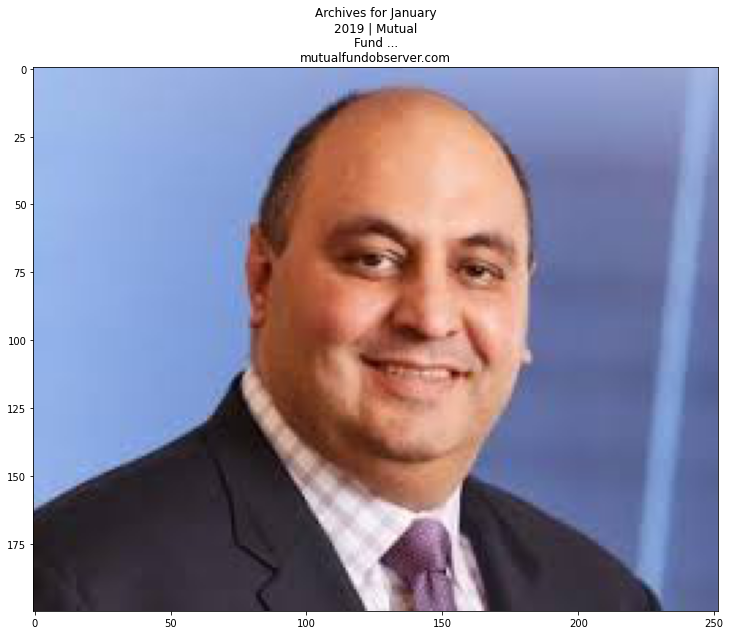

----------------------

 Michael Reed "Mike"
https://www.mutualfundobserver.com/2019/01/
We think its 1:t
RBTRX US equity


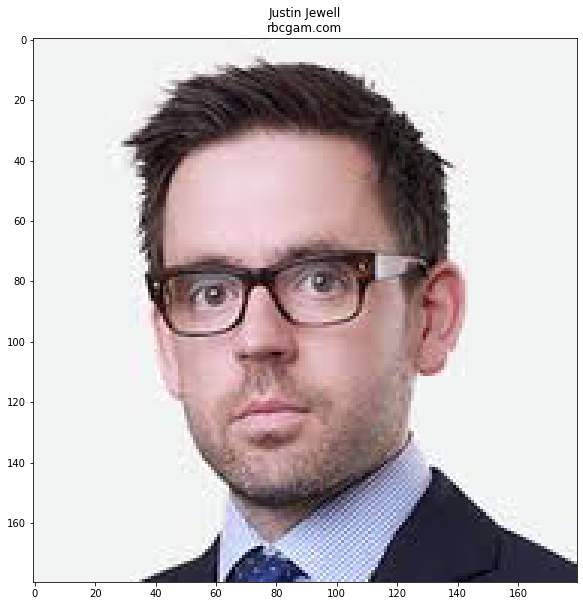

----------------------

 Justin Jewell
https://www.rbcgam.com/en/ca/profile/justin-jewell/detail
We think its 1:
/Users/jsusser/Desktop/managers/Justin Jewell/1RBTRX US equity Justin Jewell.jpg


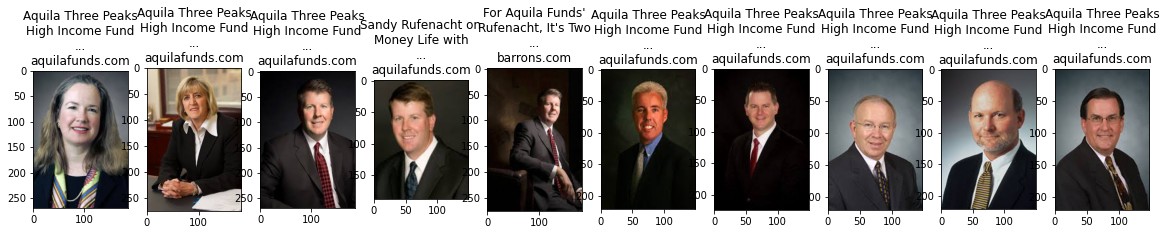

----------------------

 Sandy Rufenacht
https://aquilafunds.com/funds/aquila-three-peaks-income-fund/
https://aquilafunds.com/funds/aquila-three-peaks-income-fund/
https://aquilafunds.com/funds/aquila-three-peaks-income-fund/
https://aquilafunds.com/2019/06/19/sandy-rufenacht-on-money-life-with-chuck-jaffe/
https://www.barrons.com/articles/for-aquila-funds-rufenacht-its-two-for-the-money-1447479480
https://aquilafunds.com/funds/aquila-three-peaks-income-fund/
https://aquilafunds.com/funds/aquila-three-peaks-income-fund/
https://aquilafunds.com/funds/aquila-three-peaks-income-fund/
https://aquilafunds.com/funds/aquila-three-peaks-income-fund/
https://aquilafunds.com/funds/aquila-three-peaks-income-fund/
We think its 4:3
/Users/jsusser/Desktop/managers/Sandy Rufenacht/3ATIPX US equity Sandy Rufenacht.jpg


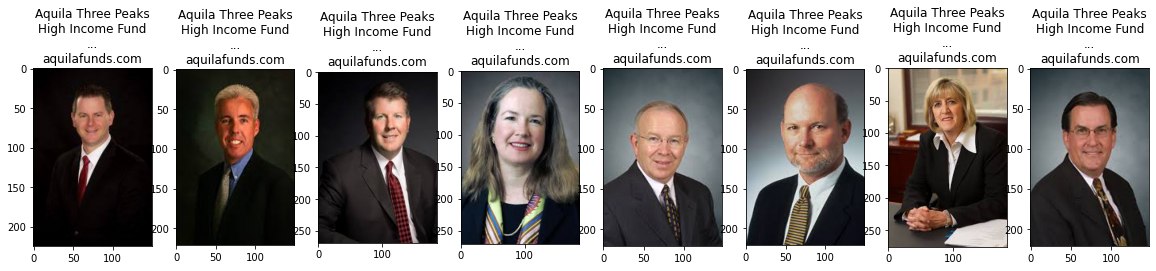

----------------------

 David M Battilega
https://aquilafunds.com/funds/aquila-three-peaks-income-fund/
https://aquilafunds.com/funds/aquila-three-peaks-income-fund/
https://aquilafunds.com/funds/aquila-three-peaks-income-fund/
https://aquilafunds.com/funds/aquila-three-peaks-income-fund/
https://aquilafunds.com/funds/aquila-three-peaks-income-fund/
https://aquilafunds.com/funds/aquila-three-peaks-income-fund/
https://aquilafunds.com/funds/aquila-three-peaks-income-fund/
https://aquilafunds.com/funds/aquila-three-peaks-income-fund/
We think its 1:
/Users/jsusser/Desktop/managers/David M Battilega/1ATIPX US equity David M Battilega.jpg


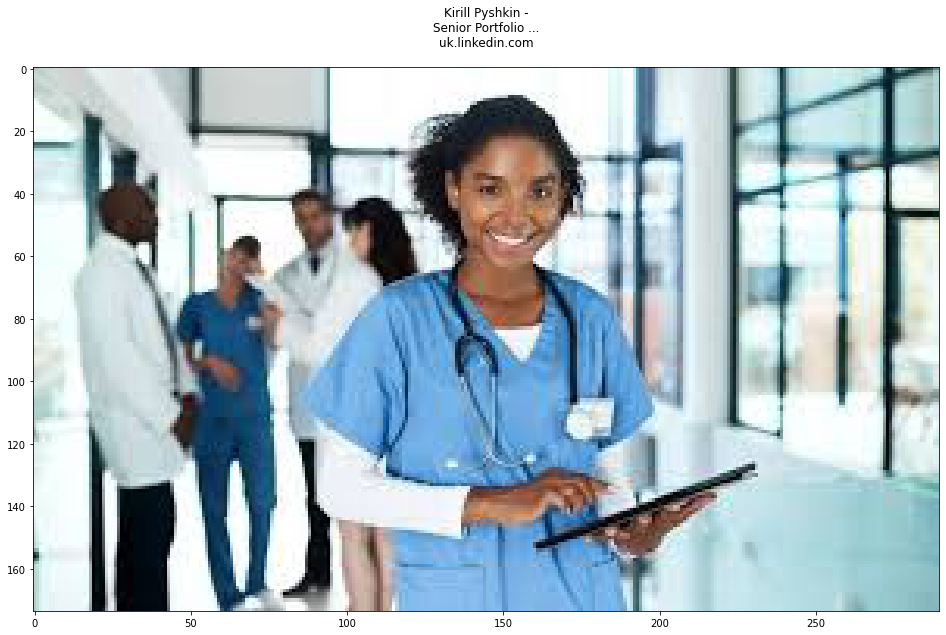

----------------------

 Simon Milledge
https://uk.linkedin.com/in/kirill-pyshkin-a5a13a
We think its 1:n
RIMOX US equity


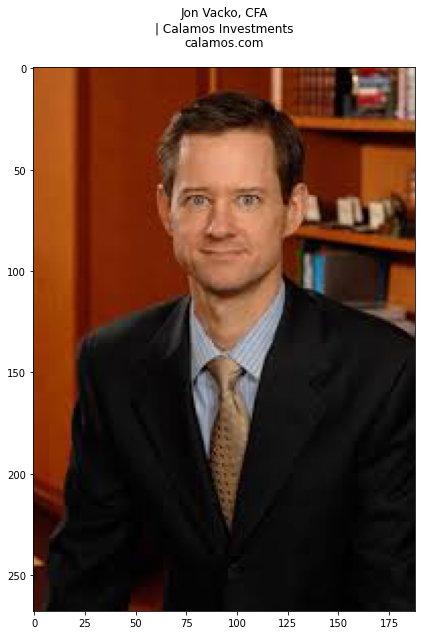

----------------------

 Jon Vacko
https://www.calamos.com/about/portfolio-management/jon-vacko/
We think its 1:
/Users/jsusser/Desktop/managers/Jon Vacko/1CCHYX US equity Jon Vacko.jpg


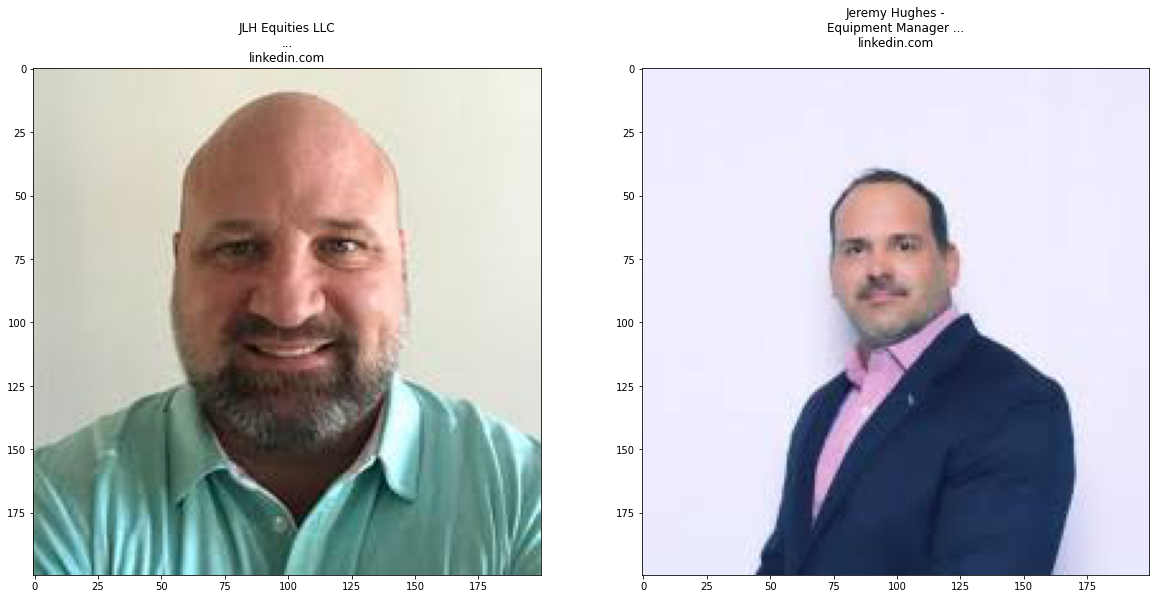

----------------------

 Jeremy Hughes
https://www.linkedin.com/in/jeremy-hughes-5154a975
https://www.linkedin.com/in/jeremy-hughes-40291040
We think its 2:n
CCHYX US equity


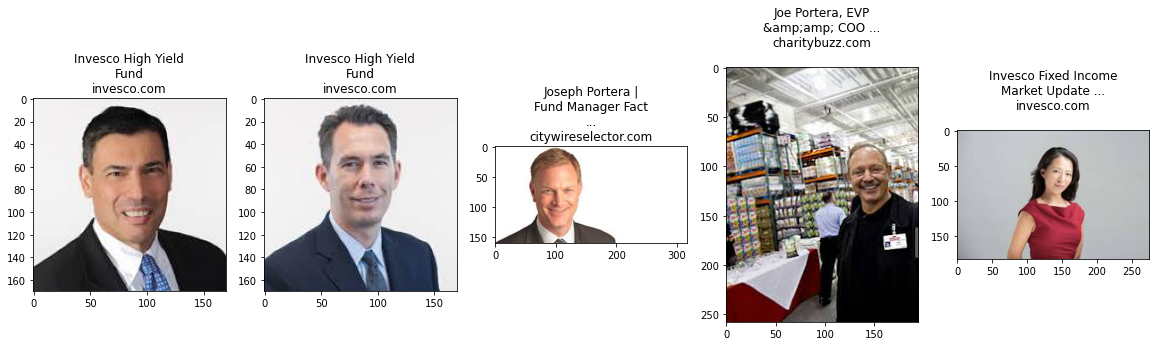

----------------------

 Joseph Portera
https://www.invesco.com/us/financial-products/mutual-funds/product-detail?audienceType=Ria&fundId=1841
https://www.invesco.com/us/financial-products/mutual-funds/product-detail?audienceType=Ria&fundId=1841
https://citywireselector.com/manager/joseph-portera/d1364
https://www.charitybuzz.com/catalog_items/auction-meet-with-joe-portera-evp-coo-of-costco-in-1871020
https://www.invesco.com/static/us/institutions/contentdetail?contentId=69245175168d6510VgnVCM100000c2f1bf0aRCRD
We think its 3:1
/Users/jsusser/Desktop/managers/Joseph Portera/1AMHYX US equity Joseph Portera.jpg


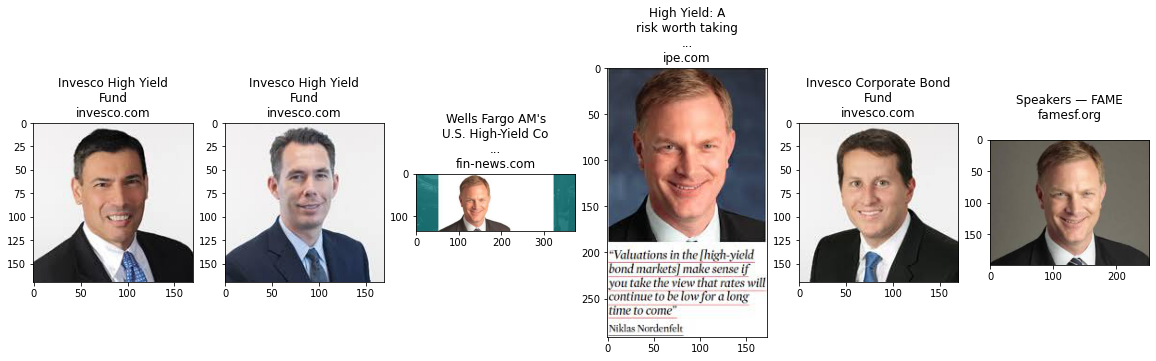

----------------------

 Niklas Nordenfelt
https://www.invesco.com/us/financial-products/mutual-funds/product-detail?audienceType=Ria&fundId=1841
https://www.invesco.com/us/financial-products/mutual-funds/product-detail?audienceType=Ria&fundId=1841
https://www.fin-news.com/2020/08/11/wells-fargo-ams-u-s-high-yield-co-head-to-exit/
https://www.ipe.com/high-yield-a-risk-worth-taking/10015464.article
https://www.invesco.com/us/financial-products/mutual-funds/product-detail?audienceType=Ria&fundId=30481
http://www.famesf.org/speakers
We think its 1:6
/Users/jsusser/Desktop/managers/Niklas Nordenfelt/8AMHYX US equity Niklas Nordenfelt.jpg


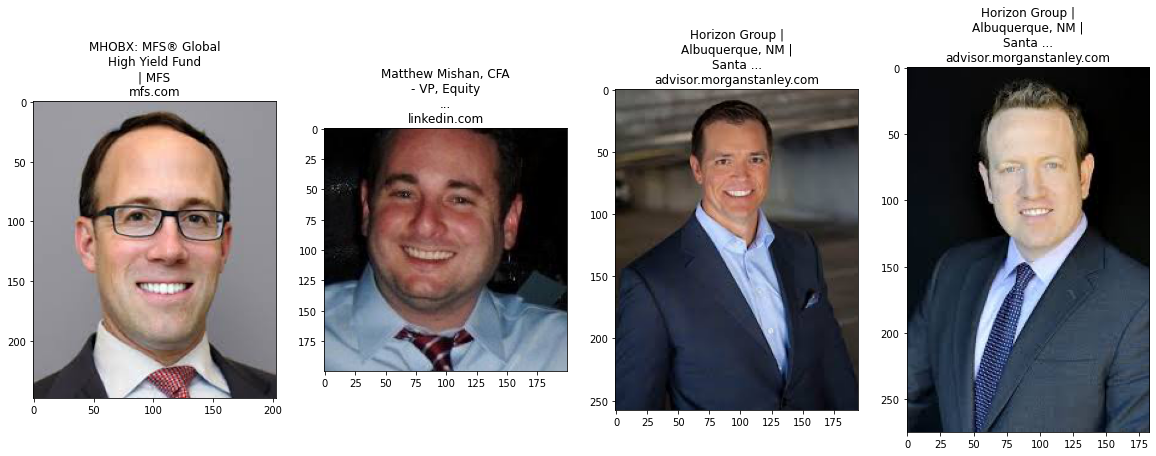

----------------------

 Matthew W Ryan
https://www.mfs.com/en-us/individual-investor/product-strategies/mutual-funds/MHOBX-mfs-global-high-yield-fund.html
https://www.linkedin.com/in/matthewmishan
https://advisor.morganstanley.com/horizon-group
https://advisor.morganstanley.com/horizon-group
We think its 1:q


In [182]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
remove = pd.DataFrame({}, columns=["name","ticker", "manager"])
done = os.listdir("/Users/jsusser/desktop/final_managers")
for manager in check["manager"].unique():
    if "%s.jpg" % manager in done:
        continue
    plt.figure(figsize=(20,10))
    k = 0
    for index, instance in check[check["manager"]==manager][:10].iterrows():
        try:
            plt.subplot(1,len(check[check["manager"]==manager]),k+1)
            img=mpimg.imread(instance["img"])
            imgplot=plt.imshow(img)
            plt.title(split(instance["href_text"]))
        except FileNotFoundError:
            continue
        k += 1
    href_texts = check[check["manager"]==manager]['href_text']
    href_texts = np.array(href_texts).tolist()
    which = list(filter(lambda x: manager.split(" ")[-1] in href_texts[x], range(len(href_texts))))
    plt.show()
    print("----------------------\n\n",manager)
    for x in check[check["manager"]==manager]['href'][:10]: print(x)
    if len(which) < 1:
        which = 1
    else: 
        which = which[0]+1
    choice = input("We think its %s:" % (which))
    if len(choice) < 1:
        choice = which
    if choice == "n": 
        instance = df[df["Manager"]==manager]
        print(instance["Ticker"].values[0])
        none.loc[len(none)] = [instance["Name_x"].values[0], instance["Ticker"].values[0], manager]
        continue
    if choice == "t": 
        instance = df[df["Manager"]==manager]
        print(instance["Ticker"].values[0])
        remove.loc[len(remove)] = [instance["Name_x"].values[0], instance["Ticker"].values[0], manager]
        continue
    if choice == "q": 
        break
    print(np.array(check[check["manager"]==manager]['img']).tolist()[int(choice)-1])
    img=cv2.imread(np.array(check[check["manager"]==manager]['img']).tolist()[int(choice)-1])
    cv2.imwrite("/Users/jsusser/Desktop/final_managers/%s.jpg" % manager, img)
    
    
    


In [ ]:
Micheal Reed "Mike"
Nick Shearn

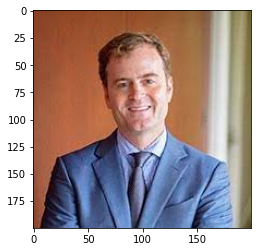

7
['Alexander Hancock "Alex".jpg', '7']


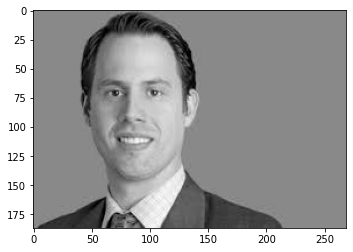

4
['Matt Sheridan.jpg', '4']


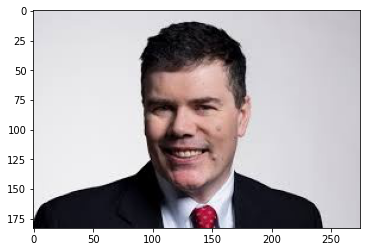

9
['Nicholas Sarchese.jpg', '9']


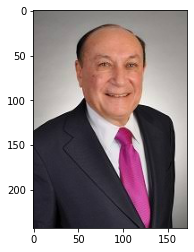

6
['Mark R Shenkman.jpg', '6']


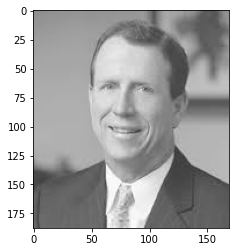

8
['Mark F Travis.jpg', '8']


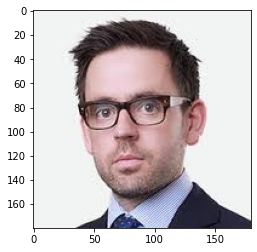

2
['Justin Jewell.jpg', '2']


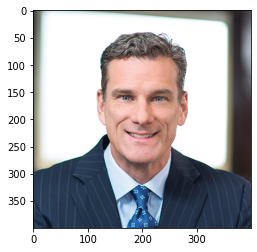

9
['Sean Feeley.jpg', '9']


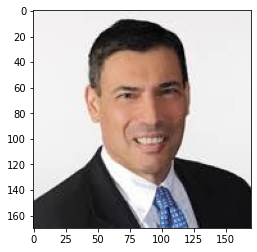

9
['Joseph Portera.jpg', '9']


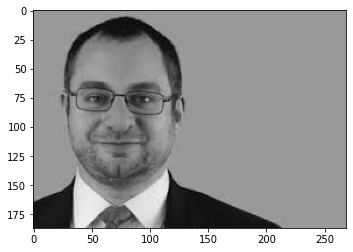

4
['Sherif M Hamid.jpg', '4']


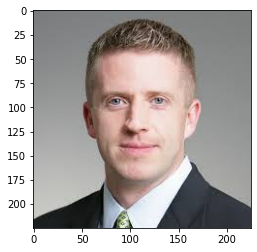

7
['Jeffrey Clarke.jpg', '7']


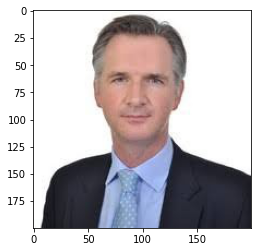

7
['John Pattullo.jpg', '7']


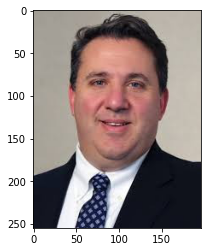

2
['Matt Shulkin.jpg', '2']


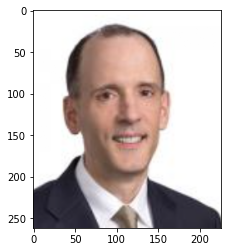

6
['George Goudelias.jpg', '6']


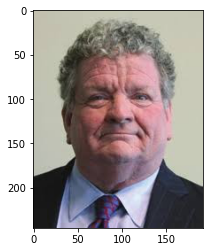

4
['Ken Monaghan.jpg', '4']


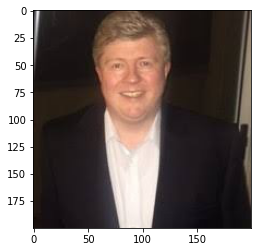

5
['Jeremy Hughes.jpg', '5']


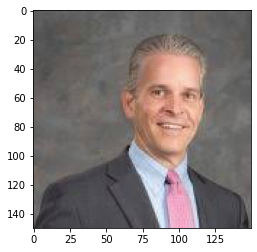

9
['Bruce H Monrad.jpg', '9']


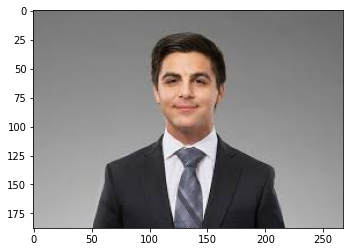

1
['Hunter Hayes.jpg', '1']


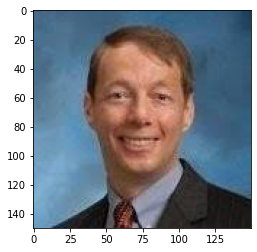

7
['Matt Freund.jpg', '7']


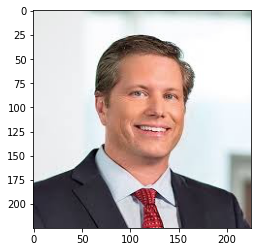

9
['Scott Roth.jpg', '9']


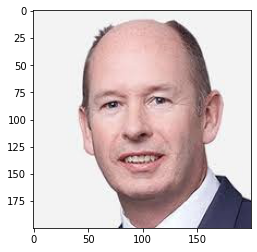

7
['Mark Dowding.jpg', '7']


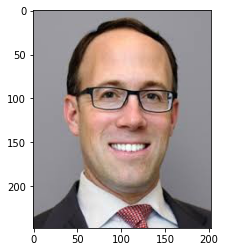

8
['Matthew W Ryan.jpg', '8']


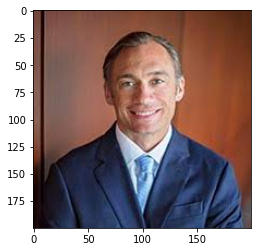

8
['Paul Dlugosch.jpg', '8']


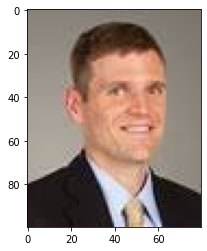

7
['Brett S Kozlowski.jpg', '7']


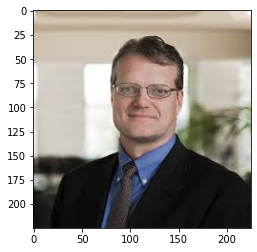

9
['Ryan Kelly.jpg', '9']


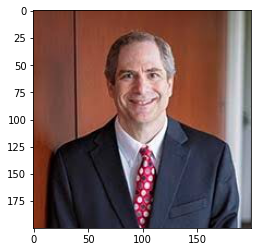

4
['Jeff Sitzmann.jpg', '4']


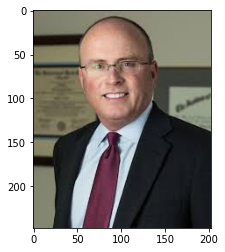

3
['Brian Clapp.jpg', '3']


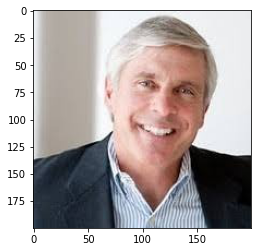

7
['David Cole.jpg', '7']


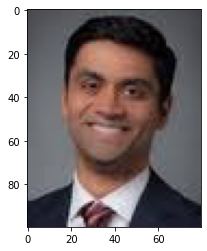

2
['Jatin Misra.jpg', '2']


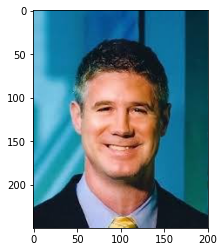

6
['Bill Housey.jpg', '6']


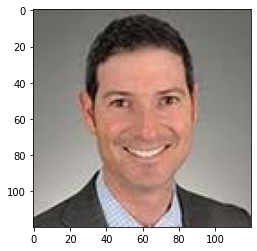

7
['Justin W Slatky.jpg', '7']


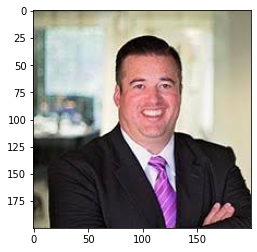

9
['Jeff Deardorff.jpg', '9']


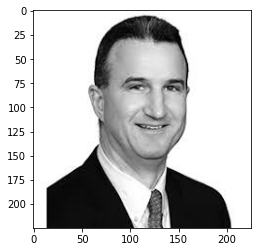

5
['John P McCarthy.jpg', '5']


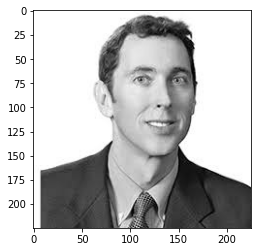

4
['Adam H Brown.jpg', '4']


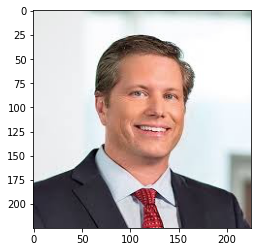

7
['Thomas McDonnell.jpg', '7']


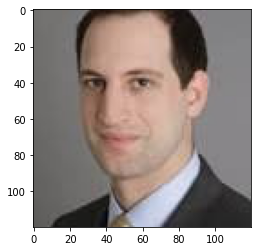

7
['Gershon M Distenfeld.jpg', '7']


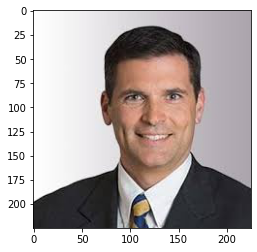

6
['James Dudnick.jpg', '6']


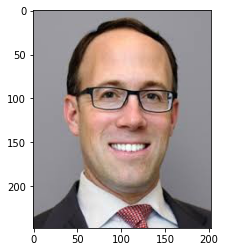

7
['Mike Skatrud.jpg', '7']


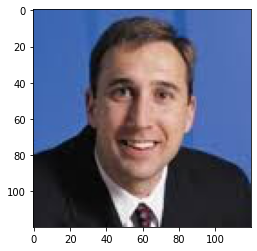

8
['Michael Paul Byrum.jpg', '8']


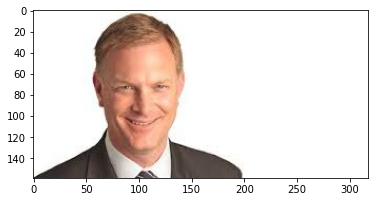

7
['Niklas Nordenfelt.jpg', '7']


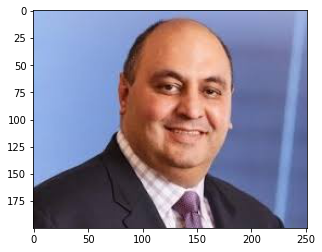

4
['Michael Reed "Mike".jpg', '4']


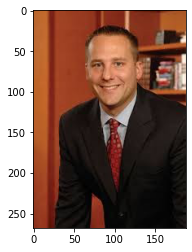

5
['Nicholas Niziolek.jpg', '5']


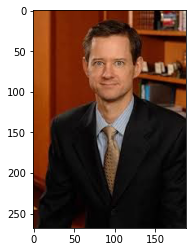

7
['Jon Vacko.jpg', '7']


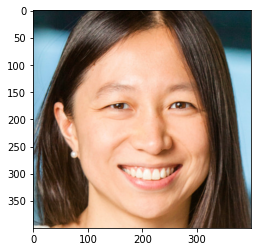

6
['Yan Zhao.jpg', '6']


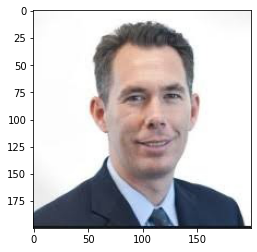

7
['Scott Roberts.jpg', '7']


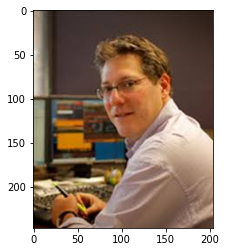

9
['David K Sherman.jpg', '9']


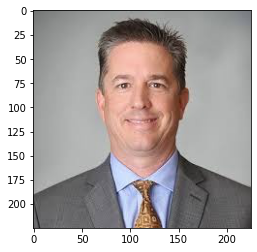

7
['Steven Gish.jpg', '7']


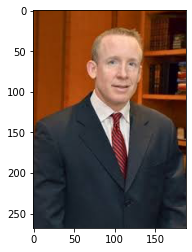

9
['Chuck Carmody.jpg', '9']


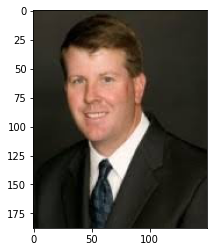

6
['Sandy Rufenacht.jpg', '6']


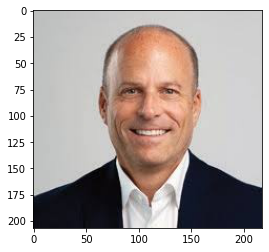

8
['Neil Wechsler.jpg', '8']


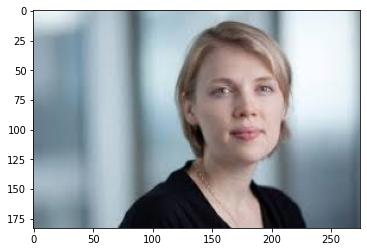

2
['Jenna Barnard.jpg', '2']


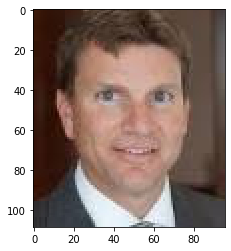

8
['Michael C Buchanan.jpg', '8']


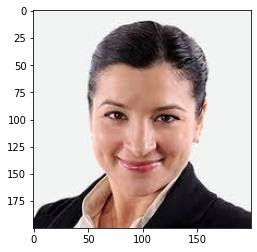

2
['Polina Kurdyavko.jpg', '2']


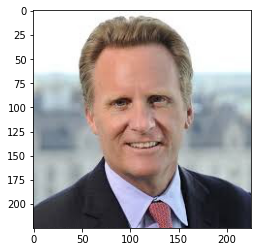

5
['Robert Cignarella.jpg', '5']


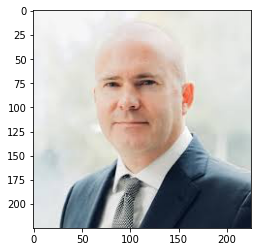

6
['Martin Horne.jpg', '6']


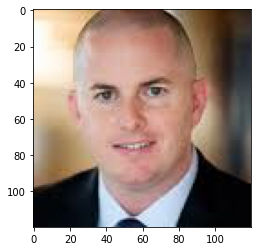

7
['Walter E Kilcullen.jpg', '7']


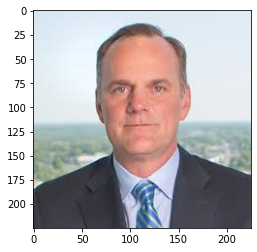

9
['David Mihalick.jpg', '9']


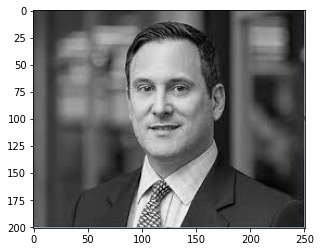

8
['Robert Gutmann.jpg', '8']


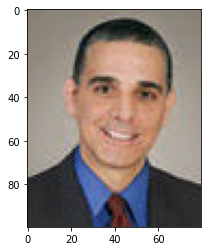

7
['Michael V Salm.jpg', '7']


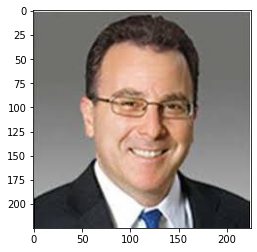

8
['Andrew Susser.jpg', '8']


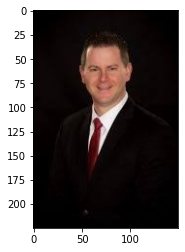

7
['David M Battilega.jpg', '7']


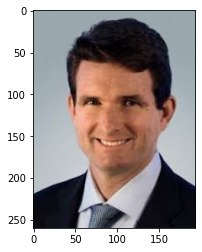

6
['Douglas G Forsyth.jpg', '6']


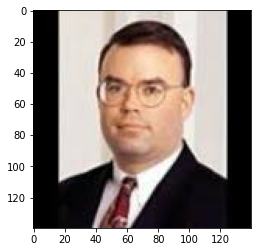

4
['Todd Bruce Johnson.jpg', '4']


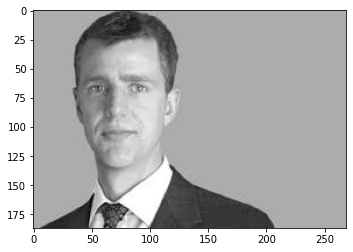

5
['Ivan Rudolph-Shabinsky.jpg', '5']


In [11]:
scores = {}
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#tf = pd.read_csv("scores2.csv", index_col=0)
tf = pd.DataFrame(columns=["names", "score"])
for x in os.listdir("/Users/jsusser/Desktop/final_managers"):
    #if len(tf[x.split('.jpg')[0] == tf["names"]]) > 0:
        
    if x == ".DS_Store":
        continue
    img=mpimg.imread("/Users/jsusser/Desktop/final_managers/%s" % x)
    imgplot=plt.imshow(img)
    plt.show()
    score = input()
    if score == "q":
        break
    print([x, score])
    tf.loc[len(tf)] = [x.split('.jpg')[0], score]
    scores[x] = score


In [83]:
lf = pd.read_csv("returns-managers.csv", index_col=0)

In [84]:
#names = [x.split(".jpg")[0] for x in scores.keys()]

#tf = pd.DataFrame({"names":names, "score": scores.values()})
#tf.to_csv("scores6.csv")

In [85]:
tf = pd.read_csv("scores2.csv", index_col=0)

In [86]:
kf = pd.merge(lf, tf, left_on="3", right_on="names", how="inner")
kf["3yr"] = abs(kf["3yr"])
kf[kf["Ticker"]=="PBHAX US equity"]

Name           Ticker       3yr                  3  \
50  PGIM High Yield Fund  PBHAX US equity  19.45022         Ryan Kelly   
52  PGIM High Yield Fund  PBHAX US equity  19.45022  Robert Cignarella   
54  PGIM High Yield Fund  PBHAX US equity  19.45022        Brian Clapp   

                names  score  
50         Ryan Kelly      9  
52  Robert Cignarella     10  
54        Brian Clapp      7

In [87]:
def find(name):
    for x in ["Inverse", "Short", "Tactical", "Low", "Limited", "Risk", "Mortgage", "Floating"]:
        if x in name:
            return False
    return True

kf = kf[kf["Name"].apply(find)]

In [90]:
kf["score"] = kf["score"].astype('float')
kf = kf.rename(columns={"3yr": "return", "B": "c"})
kf["return"] = kf["return"].astype('float')
kf = kf.sort_values(by="score")
kf = kf.groupby(by=['Ticker']).agg({"score":"mean", "return":"first", "Name": "first"})
kf.to_csv("kf.csv")
kf

score     return  \
Ticker                                 
AGDAX US equity  5.000000   9.729970   
AMHYX US equity  7.666667  12.184440   
ATIPX US equity  7.500000  13.298280   
BXIAX US equity  9.000000   9.730181   
CCHYX US equity  5.600000  11.754410   
DHOAX US equity  2.000000  17.618270   
DPHYX US equity  5.500000  17.646670   
FIFIX US equity  5.500000  13.642550   
FYAIX US equity  3.000000  11.193380   
HIYYX US equity  4.000000  21.410190   
HYFAX US equity  5.666667  16.651300   
ICMUX US equity  5.000000  14.255930   
LZHYX US equity  5.000000  15.054990   
MHOBX US equity  8.000000  12.011590   
MKHCX US equity  8.000000  12.697210   
MPHAX US equity  9.000000  12.996410   
NTHEX US equity  6.000000   6.637250   
PBHAX US equity  8.666667  19.450220   
RBTRX US equity  5.000000   9.933056   
RGHYX US equity  2.000000  25.492510   
RIMOX US equity  6.000000   8.741852   
SHYAX US equity  2.000000  14.019510   

                                                              Name  
Ticker                                                              
AGDAX US equity                            AB High Income Fund Inc  
AMHYX US equity                            Invesco High Yield Fund  
ATIPX US equity                Aquila Three Peaks High Income Fund  
BXIAX US equity    Barings Global Credit Income Opportunities Fund  
CCHYX US equity                           Calamos High Income Fund  
DHOAX US equity             Delaware High-Yield Opportunities Fund  
DPHYX US equity                Macquarie High Yield Bond Portfolio  
FIFIX US equity                      Delaware Fund For Income Fund  
FYAIX US equity                        Access Flex High Yield Fund  
HIYYX US equity                    AB FlexFee High Yield Portfolio  
HYFAX US equity                        Harbor High-Yield Bond Fund  
ICMUX US equity                               Intrepid Income Fund  
LZHYX US equity               Lazard US Corporate Income Portfolio  
MHOBX US equity                         MFS Global High Yield Fund  
MKHCX US equity     MainStay MacKay High Yield Corporate Bond Fund  
MPHAX US equity                 MassMutual Premier High Yield Fund  
NTHEX US equity                          Northeast Investors Trust  
PBHAX US equity                               PGIM High Yield Fund  
RBTRX US equity                       RBC BlueBay Global Bond Fund  
RGHYX US equity                   RBC BlueBay High Yield Bond Fund  
RIMOX US equity  City National Rochdale Fixed Income Opportunit...  
SHYAX US equity  SEI Institutional Managed Trust - High Yield B...

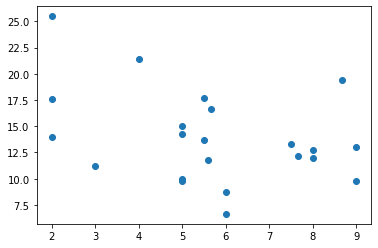

In [92]:
plt.plot(kf["score"],kf["return"], "o")

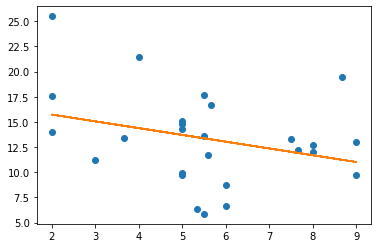

In [47]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

temperature = np.array(kf["score"])
temperature = temperature.reshape(-1, 1)
sales = np.array(kf["return"])

plt.plot(temperature, sales, 'o')

line_fitter = LinearRegression()
line_fitter.fit(temperature, sales)
sales_predict = line_fitter.predict(temperature)

plt.plot(temperature, sales_predict)
plt.show()

In [65]:
from sklearn.metrics import r2_score
print("Test score:")
r2_score(sales, sales_predict)

Test score:


0.09154089407848165

In [99]:

kf.to_csv("kf.csv")

In [21]:
#kf["return"].value_counts()
dirr = [x.split(".jpg")[0] for x in os.listdir("/Users/jsusser/desktop/final_managers")]
#pred = [x[0] for x in pred]
df = pd.DataFrame({"names": dirr, "score": pred})
df

names     score
0   Alexander Hancock "Alex"  1.546767
1              Matt Sheridan  2.264159
2          Nicholas Sarchese  2.612245
3            Mark R Shenkman  1.456823
4              Mark F Travis  2.151882
..                       ...       ...
58             Andrew Susser  2.772708
59         David M Battilega  1.281628
60         Douglas G Forsyth  2.269377
61        Todd Bruce Johnson  2.207786
62    Ivan Rudolph-Shabinsky  2.224809

[63 rows x 2 columns]

In [18]:
pred = [[1.5467674],
       [2.2641585],
       [2.6122448],
       [1.4568226],
       [2.1518822],
       [3.3526187],
       [2.3348992],
       [2.9024842],
       [1.7406093],
       [2.8499656],
       [2.572432 ],
       [2.2875247],
       [2.8412282],
       [1.6991736],
       [1.9582273],
       [2.4361289],
       [1.4714198],
       [2.022859 ],
       [2.6804657],
       [3.0752635],
       [2.9160876],
       [1.2345506],
       [2.3328426],
       [1.5270739],
       [1.478362 ],
       [1.5300711],
       [2.451001 ],
       [1.9558686],
       [2.713425 ],
       [2.792785 ],
       [2.225312 ],
       [3.0389352],
       [2.840967 ],
       [2.6804657],
       [2.374637 ],
       [2.8560903],
       [2.9160876],
       [2.476189 ],
       [2.0604067],
       [2.3011887],
       [1.3855056],
       [1.2525213],
       [2.60005  ],
       [2.9668243],
       [1.3907064],
       [2.454692 ],
       [1.0619923],
       [2.0436487],
       [2.513237 ],
       [2.3223536],
       [2.400427 ],
       [3.6681082],
       [2.2996056],
       [2.1722825],
       [2.8051836],
       [2.116833 ],
       [2.3920012],
       [2.4678452],
       [2.7727077],
       [1.2816284],
       [2.269377 ],
       [2.207786 ],
       [2.224809 ]]